In [ ]:
!pip install lida

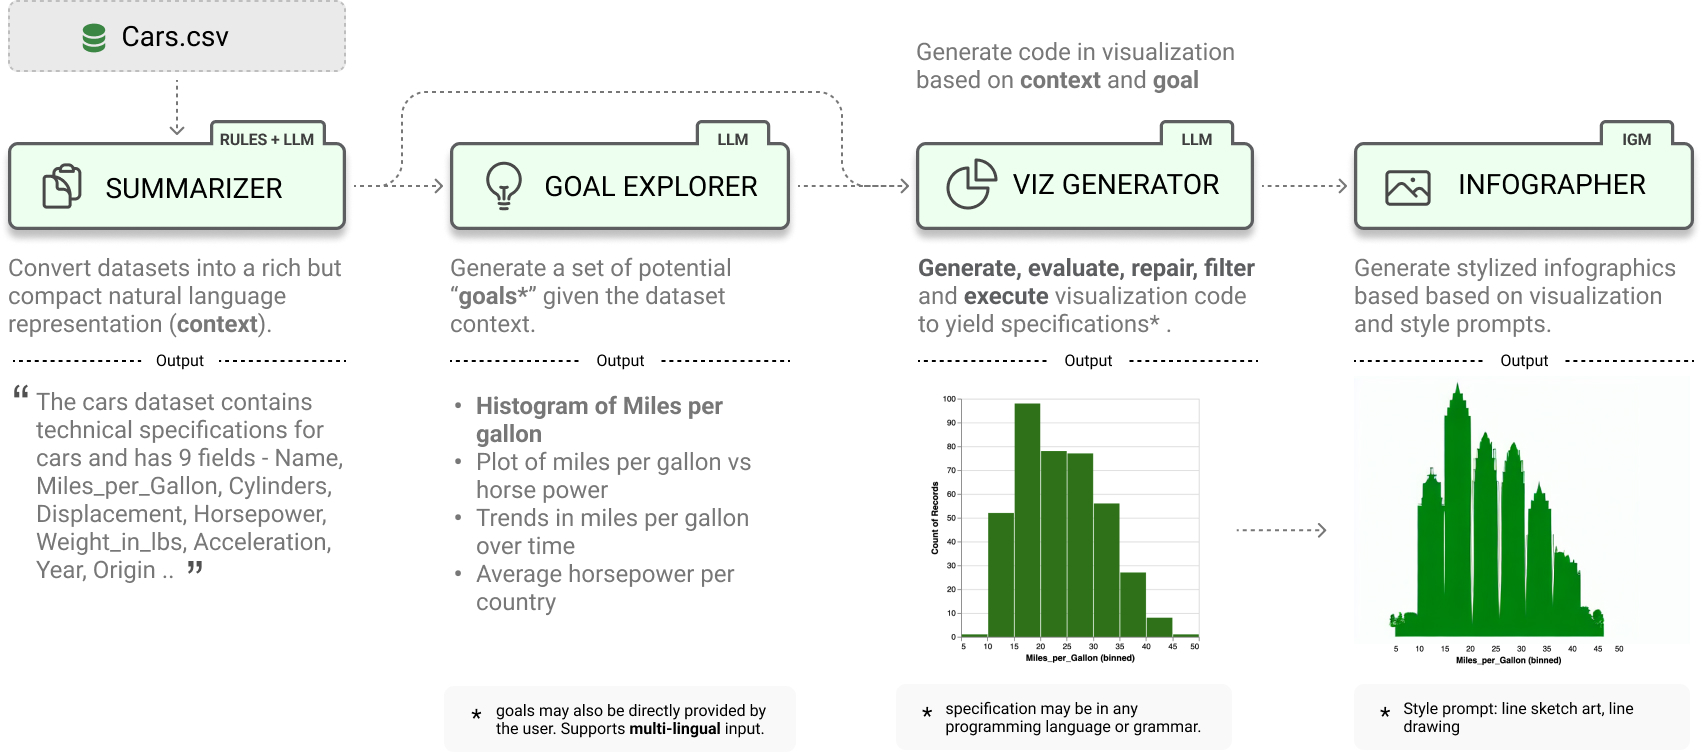

In [1]:
from IPython.display import Image
Image('https://microsoft.github.io/lida/files/lidamodules.jpg')

# This is an adaptation from original work  https://microsoft.github.io/lida/

## Summarize Data, Generate Goals

In [12]:
from google.colab import userdata
api_key = userdata.get('OPENAI_API_KEY')
from lida import Manager, TextGenerationConfig , llm
lida = Manager(text_gen = llm("openai", api_key=api_key)) # !! api key
textgen_config = TextGenerationConfig(n=1, temperature=0.5, model="gpt-4o-mini-2024-07-18", use_cache=True)

summary = lida.summarize("./global-plastics-production.csv", summary_method="default", textgen_config=textgen_config)
# Fetch the dataset from here...https://www.kaggle.com/datasets/sohamgade/plastic-datasets
goals = lida.goals(summary, n=2, textgen_config=textgen_config)

for goal in goals:
    display(goal)


### Goal 0
---
**Question:** How has global plastics production changed over the years?

**Visualization:** `line chart of Year vs Global_plastics_production__million_tonnes_`

**Rationale:** This visualization will show the trend of global plastics production from 1950 to 2015, allowing us to identify periods of significant increase or decrease. The 'Year' field provides the timeline, while 'Global_plastics_production__million_tonnes_' quantifies the production, revealing insights into industrial growth and environmental impact.



### Goal 1
---
**Question:** What is the average global plastics production per decade?

**Visualization:** `bar chart of average Global_plastics_production__million_tonnes_ by decade`

**Rationale:** Using the 'Year' field to group data into decades and calculating the average for 'Global_plastics_production__million_tonnes_', this bar chart will provide a clear comparison of production levels across different decades. This helps in understanding long-term trends and patterns in plastics production, which is crucial for policy-making and environmental strategies.


## Generate Visualizations

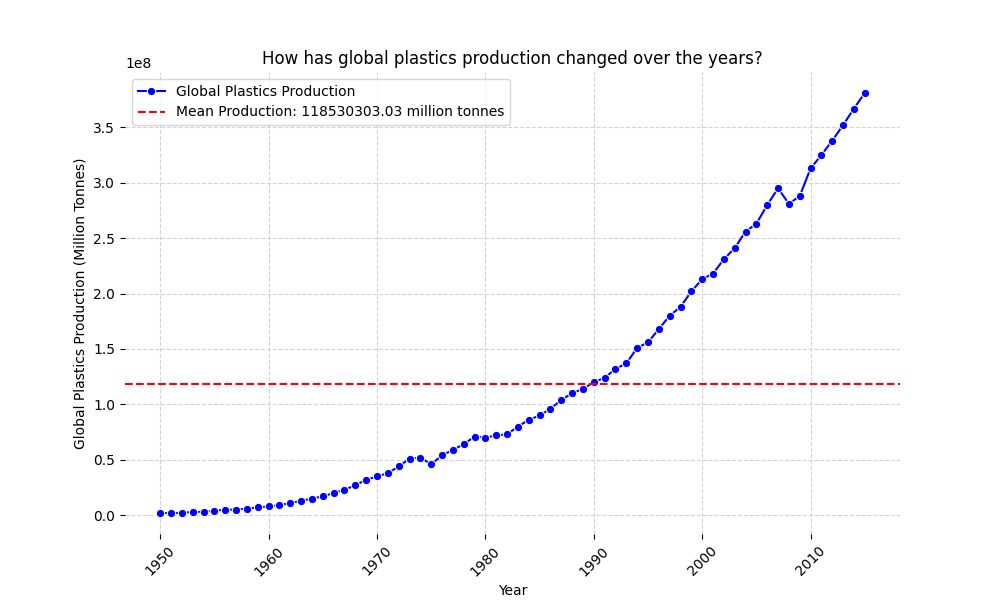

In [13]:
i = 0
library = "seaborn"
textgen_config = TextGenerationConfig(n=1, temperature=0.2, use_cache=True)
charts = lida.visualize(summary=summary, goal=goals[i], textgen_config=textgen_config, library=library)
charts[0]

### Generate visualization via a "user query"   

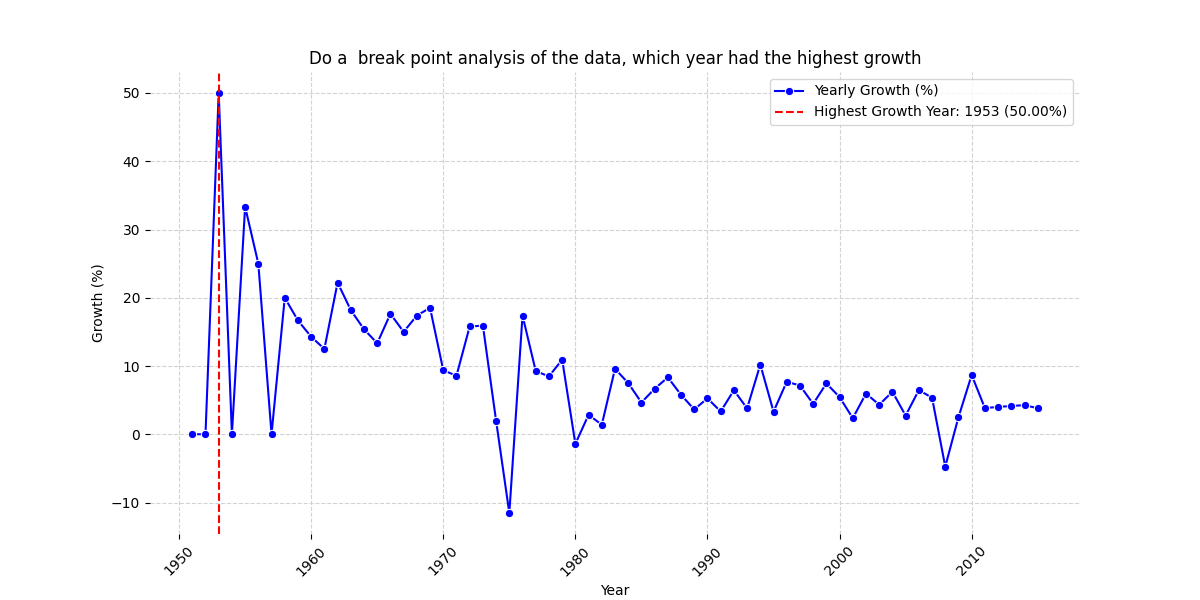

In [14]:
user_query = "Do a  break point analysis of the data, which year had the highest growth"
textgen_config = TextGenerationConfig(n=1, temperature=0.2, use_cache=True)
charts = lida.visualize(summary=summary, goal=user_query, textgen_config=textgen_config)
charts[0]

# VizOps

Given that LIDA represents visualizations as code,
the VISGENERATOR also implements submodules
to perform operations on this representation.

This includes
- **Natural language based visualization refinement**: Provides a conversational api to iteratively
4Execution in a sandbox environment is recommended.
refine generated code (e.g., translate chart t hindi
. . . zoom in by 50% etc) which can then be executed to generate new visualizations.
- **Visualization explanations and accessibility**:
Generates natural language explanations (valuable
for debugging and sensemaking) as well as accessibility descriptions (valuable for supporting users
with visual impairments).

- **Visualization code self-evaluation and repair**:
Applies an LLM to self-evaluate generated code on
multiple dimensions (see section 4.1.2).

- **Visualization recommendation**: Given some context (goals, or an existing visualization), recommend additional visualizations to the user (e.g., for
comparison, or to provide additional perspectives).



## Natural language based visualization refinement

Given some code, modify it based on natural language instructions. This yields a new code snippet that can be executed to generate a new visualization.

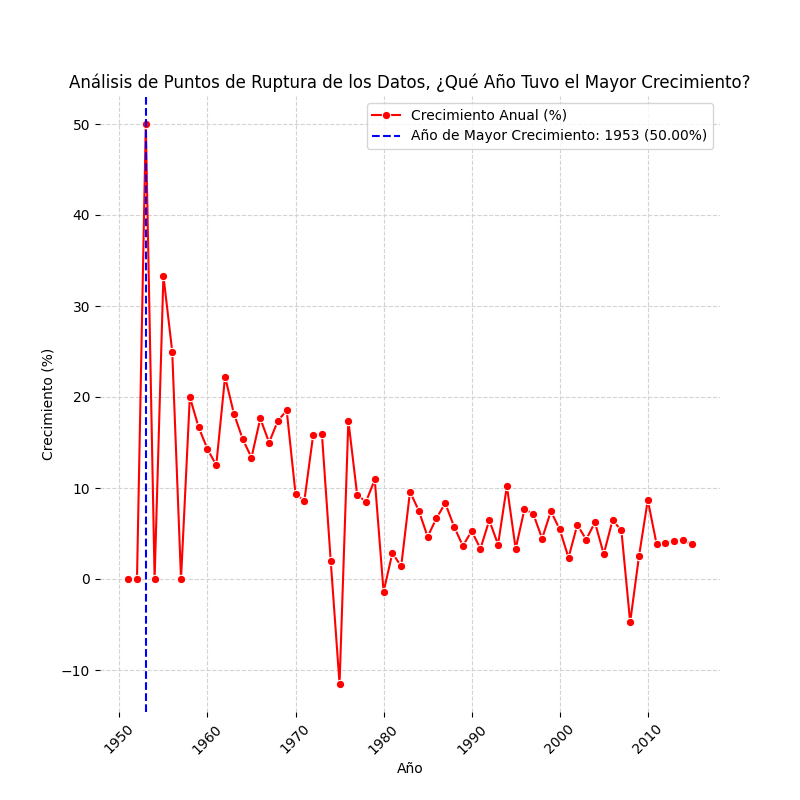

In [15]:
code = charts[0].code
textgen_config = TextGenerationConfig(n=1, temperature=0, use_cache=True)
instructions = ["make the chart height and width equal", "change the color of the chart to red", "translate the chart to spanish"]
edited_charts = lida.edit(code=code,  summary=summary, instructions=instructions, library=library, textgen_config=textgen_config)
edited_charts[0]

## Visualization explanations and accessibility

In [16]:
explanations = lida.explain(code=code, library=library, textgen_config=textgen_config)
for row in explanations[0]:
    print(row["section"]," ** ", row["explanation"])

accessibility  **  The chart is a line plot that visualizes the year-on-year growth in global plastics production. It uses a blue line with circular markers to represent the growth percentage over the years. A red dashed vertical line indicates the year with the highest growth, providing a clear visual cue. The title describes the analysis focus, and the axes are labeled for clarity. The main insight is to identify trends in growth and pinpoint the year with the highest increase.
transformation  **  This section of the code performs data transformation by calculating the year-on-year growth in global plastics production. The 'Growth' column is created by applying the percentage change function to the 'Global_plastics_production__million_tonnes_' column. It also identifies the year with the highest growth and its corresponding value, which are stored in 'max_growth_year' and 'max_growth_value' respectively.
visualization  **  This section creates the visualization. It initializes a figu

## Visualization Recommendation

In [17]:
textgen_config = TextGenerationConfig(n=2, temperature=0.2, use_cache=True)
recommended_charts =  lida.recommend(code=code, summary=summary, n=2,  textgen_config=textgen_config)

Recommended 2 charts


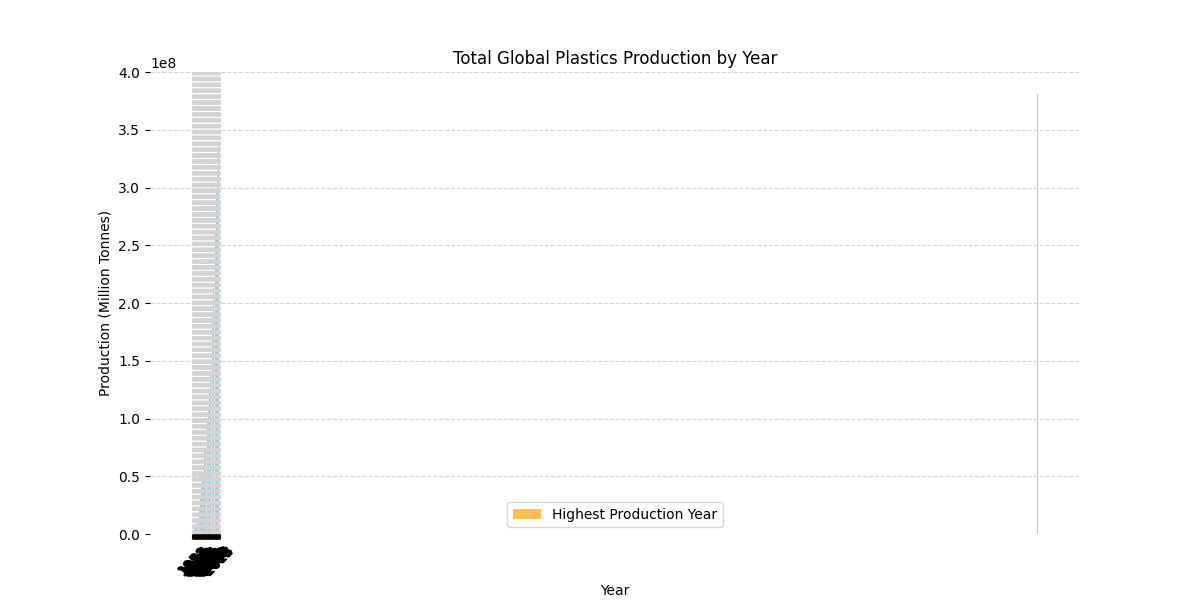

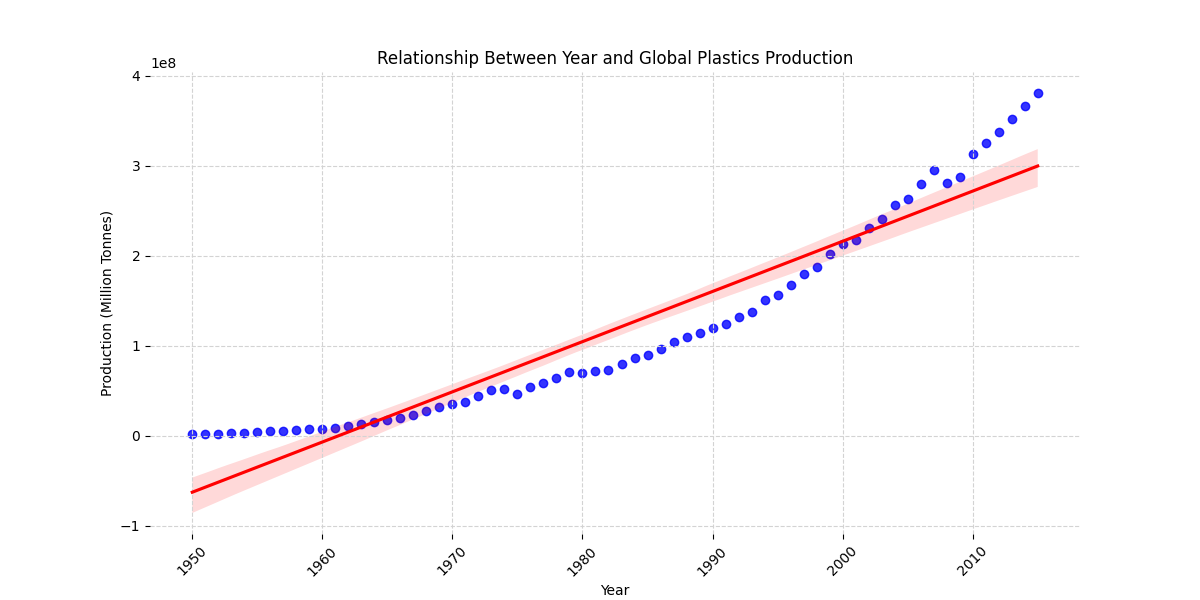

In [20]:
print(f"Recommended {len(recommended_charts)} charts")
for chart in recommended_charts:
    display(chart)

## Infographics (Beta)

- Explores using LIDA to generate infographics from an existing visualization
- Uses the `peacasso` package, and loads open source stable diffusion models
- You will need to run `pip install lida[infographics]` to install the required dependencies.
- Currently work in progress (work being done to post process infographics with chart axis and title overlays from the original visualization, add presets for different infographic styles, and add more stable diffusion models)


In [ ]:
!pip install lida[infographics]
# ensure you have a GPU runtime

In [ ]:
infographics = lida.infographics(visualization = edited_charts[0].raster, n=1, style_prompt="pastel art")
from lida.utils import plot_raster
plot_raster([edited_charts[0].raster, infographics["images"][0]])